# **Question 4**

In [20]:
import numpy as np
import pandas as pd
import random as rm
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv('T2D_abundance.csv', delim_whitespace = True)

In [22]:
data.head(5)

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_catenulatum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_longum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_pseudocatenulatum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella|s__Gardnerella_vaginalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Adlercreutzia|s__Adlercreutzia_equolifaciens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium|s__Atopobium_parvulum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium|s__Atopobium_rimae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella_aerofaciens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Coriobacteriaceae_noname|s__Coriobacteriaceae_bacterium_phI,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella|s__Eggerthella_lenta,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella|s__Eggerthella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Gordonibacter|s__Gordonibacter_pamelaeae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Olsenella|s__Olsenella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Slackia|s__Slackia_piriformis,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_barnesiae,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_caccae,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_cellulosilyticus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales

In [23]:
data.describe()

,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_unclassified,k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanosphaera|s__Methanosphaera_stadtmanae,k__Bacteria|p__Acidobacteria|c__Acidobacteriia|o__Acidobacteriales|f__Acidobacteriaceae|g__Acidobacteriaceae_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_graevenitzii,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_odontolyticus,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Actinomyces|s__Actinomyces_turicensis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Actinomycetaceae|g__Varibaculum|s__Varibaculum_cambriense,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_mucilaginosa,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Actinomycetales|f__Micrococcaceae|g__Rothia|s__Rothia_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_adolescentis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_bifidum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_catenulatum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_longum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium_pseudocatenulatum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Bifidobacteriales|f__Bifidobacteriaceae|g__Gardnerella|s__Gardnerella_vaginalis,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Adlercreutzia|s__Adlercreutzia_equolifaciens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium|s__Atopobium_parvulum,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Atopobium|s__Atopobium_rimae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella_aerofaciens,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Collinsella|s__Collinsella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Coriobacteriaceae_noname|s__Coriobacteriaceae_bacterium_phI,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella|s__Eggerthella_lenta,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Eggerthella|s__Eggerthella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Gordonibacter|s__Gordonibacter_pamelaeae,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Olsenella|s__Olsenella_unclassified,k__Bacteria|p__Actinobacteria|c__Actinobacteria|o__Coriobacteriales|f__Coriobacteriaceae|g__Slackia|s__Slackia_piriformis,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_barnesiae,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_caccae,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales|f__Bacteroidaceae|g__Bacteroides|s__Bacteroides_cellulosilyticus,k__Bacteria|p__Bacteroidetes|c__Bacteroidia|o__Bacteroidales

In [24]:
columnClass = data.pop('Class')

In [25]:
microbiomePCA = PCA(n_components = 2)
microbiomePCA.fit(StandardScaler().fit_transform(data))
print('Variance is',microbiomePCA.explained_variance_ratio_, 'Singular values are - ', microbiomePCA.singular_values_)
print('\n\n')

transformedData = microbiomePCA.transform(data)
dfData = pd.DataFrame(data = transformedData, columns = ['PrincComp1', 'PrincCompC2'])
dfData['Class'] = columnClass.tolist()
dfData

Variance is [0.05774328 0.0388078 ] Singular values are -  [106.59282117  87.38497553]





/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,PrincComp1,PrincCompC2,Class
0,-0.523320,-0.239359,n
1,-0.553342,-0.317217,n
2,0.832861,-0.031623,n
3,-0.646032,-0.624104,n
4,-0.406239,0.281436,n
...,...,...,...
339,0.200765,-0.105551,n
340,-0.546863,-0.539281,n
341,-0.406330,-0.491731,n
342,1.290161,0.057231,n


Let us plot the graph now

Text(0.5, 1.0, 'Principal Component Analysis of Microbiome Dataset')

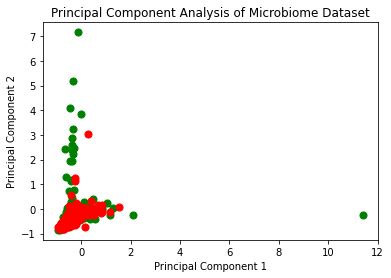

In [26]:
targets = ['n', 't2d']
colors = {'n':'g', 't2d':'r'}
for target in targets:
        indices = dfData['Class'] == target
        plt.scatter(dfData.loc[indices, 'PrincComp1'], dfData.loc[indices, 'PrincCompC2'], c = colors[target], s = 50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Principal Component Analysis of Microbiome Dataset")

PCA can be used to
reduce the dimensionality of datasets. 
Talking specifically about this dataset – Although the dimensionality has been reduced
significantly, PCA has not clustered the two features distinctively. As we see we can not distinguish two different clusters after doing Principal component analysis. Since we do not see clusters of people
according to their disease status, PCA is not a good approach for dimensionality reduction for this dataset.

Now we check how t-sne performs

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0.5, 1.0, 't-sne of Microbiome Dataset')

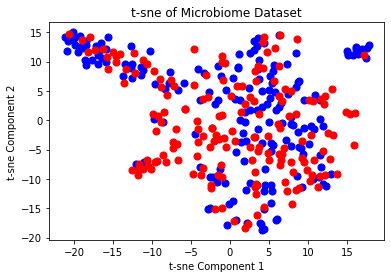

In [27]:
tsne = TSNE(n_components=2).fit_transform(data)
data_DF_tsne = pd.DataFrame(tsne, columns = ['tsne1', 'tsne2'])
data_DF_tsne['Class'] = columnClass.tolist()

targets = ['n', 't2d']
colors = {'n':'b', 't2d':'r'}
for target in targets:
        indices = data_DF_tsne['Class'] == target
        plt.scatter(data_DF_tsne.loc[indices, 'tsne1'], data_DF_tsne.loc[indices, 'tsne2'], c = colors[target], s = 50)
plt.xlabel('t-sne Component 1')
plt.ylabel('t-sne Component 2')
plt.title("t-sne of Microbiome Dataset")


Here we see that these two clusters are not separated even by t-sne. We can not distinguish two different clusters after doing t-sne. Since we do not see clusters of people
according to their disease status, t-sne is also not a good approach for dimensionality reduction for this dataset.

# **Question 5**

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

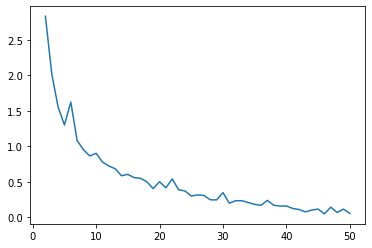

In [10]:
stop = np.arange(start = 2, stop = 51, step = 1)
y = []

for l in stop:
    data = np.random.randint(1, 1000, size = (500, l))
    distList = []

    for i in range(len(data)):
      for j in range(i + 1, len(data)):
        sumSq = 0

        for k in range(len(data[j])):
            sumSq += (data[i][k] - data[j][k])**2

        eucDist = np.sqrt(sumSq)
        distList.append(eucDist)

    minDistance = np.min(distList)
    maxDistance = np.max(distList)

    x = np.log10((maxDistance - minDistance) / minDistance)
    y.append(x)

plt.plot(stop, y)
plt.show()